<a href="https://colab.research.google.com/github/financieras/math/blob/main/regresion/regresion_lineal06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal, algoritmo del descenso del gradiente
Queremos estimar la recta de regresión entre el kilometraje de una serie de coches y su precio en el mercado de segunda mano.

* variable independiente (X): kilometraje
* variable dependiente (Y): precio

Vamos a utilizar el algoritmo de descenso del gradiente por dos métodos:
    1. Método no matricial
    2. Método matricial

Obtendremos:

    1. Gráfica de la nube de dispersión
    2. Gráfica superpuesta de la recta de regresión
    3. Normalización de los datos y posterior desnormalización
    4. Estimación de los parámetros de la recta de regresión
    5. Bondad del ajuste medida por $R^2$

# Método no matricial

In [1]:
# obtenemos el archivo data.csv que queda en local para poder usarlo desde este notebook
!wget https://raw.githubusercontent.com/financieras/math/main/regresion/ft-linear-regression/data/data.csv

--2024-11-01 07:32:48--  https://raw.githubusercontent.com/financieras/math/main/regresion/ft-linear-regression/data/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281 [text/plain]
Saving to: ‘data.csv.5’

data.csv.5          100%[===================>]     281  --.-KB/s    in 0s      

2024-11-01 07:32:48 (15.5 MB/s) - ‘data.csv.5’ saved [281/281]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('data.csv')    # df representa el DataFrame

# Crear el array X (kilómetros) como vector unidimensional
X = df['km'].values

# Crear el array Y (precios)
Y = df['price'].values

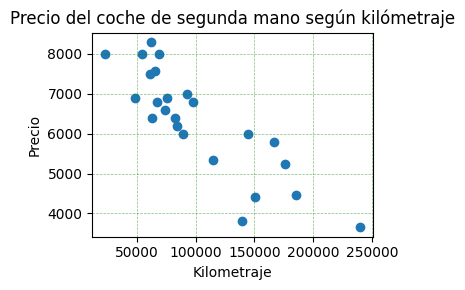

In [3]:
plt.figure(figsize=(4, 3))  # Crear una figura con Ancho: 4, Alto: 3
plt.scatter(X, Y)
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.title('Precio del coche de segunda mano según kilómetraje')
plt.grid(color='green', linestyle='--', linewidth=0.5, alpha=0.5)
# Ajustar los márgenes
plt.tight_layout()
plt.show()

## Algoritmo del descenso del gradiente. Método no matricial

In [4]:
# Normalización de X e Y
X_mean, X_std = np.mean(X), np.std(X)
Y_mean, Y_std = np.mean(Y), np.std(Y)

X_norm = (X - X_mean) / X_std
Y_norm = (Y - Y_mean) / Y_std

# Parámetros de la regresión
theta1_norm = 0  # Pendiente inicial normalizada
theta0_norm = 0  # Intercepto inicial normalizado

# Configuración del algoritmo
learning_rate = 0.01
num_iterations = 1000

# Implementación del descenso del gradiente con datos normalizados
for _ in range(num_iterations):
    # Calcular las predicciones actuales
    Y_pred_norm = theta1_norm * X_norm + theta0_norm

    # Calcular los gradientes
    m = len(X)  # número de muestras
    D_theta1_norm = (1/m) * np.sum(X_norm * (Y_pred_norm - Y_norm))
    D_theta0_norm = (1/m) * np.sum(Y_pred_norm - Y_norm)

    # Actualizar los parámetros
    theta1_norm -= learning_rate * D_theta1_norm
    theta0_norm -= learning_rate * D_theta0_norm

# Desnormalización de los parámetros
theta1 = theta1_norm * (Y_std / X_std)
theta0 = Y_mean - theta1 * X_mean + theta0_norm * Y_std

print(f"Intercepto (theta0): {theta0}")
print(f"Pendiente (theta1): {theta1}")

Intercepto (theta0): 8499.506064757234
Pendiente (theta1): -0.02144803761318838


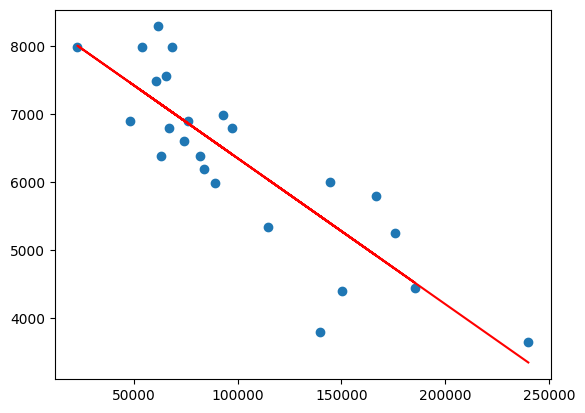

In [5]:
plt.scatter(X, Y)
plt.plot(X, theta0 + theta1 * X, color='red')
plt.show()

## Medir al bondad del ajuste con $R^2$

In [6]:
# Calcular predicciones con los parámetros finales
Y_pred = theta1 * X + theta0

# Cálculo de R²
ss_res = np.sum((Y - Y_pred) ** 2)  # Suma de residuos al cuadrado
ss_tot = np.sum((Y - Y_mean) ** 2)  # Suma total de cuadrados
r_squared = 1 - (ss_res / ss_tot)

print(f"R²: {r_squared:.4f}")

R²: 0.7330


# Método matricial

In [7]:
# obtenemos el archivo data.csv que queda en local para poder usarlo desde este notebook
!wget https://raw.githubusercontent.com/financieras/math/main/regresion/ft-linear-regression/data/data.csv

--2024-11-01 07:32:50--  https://raw.githubusercontent.com/financieras/math/main/regresion/ft-linear-regression/data/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281 [text/plain]
Saving to: ‘data.csv.6’

data.csv.6          100%[===================>]     281  --.-KB/s    in 0s      

2024-11-01 07:32:50 (15.3 MB/s) - ‘data.csv.6’ saved [281/281]



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('data.csv')    # df representa el DataFrame

# Crear el array X (kilómetros) como vector unidimensional
X = df['km'].values

# Crear el array Y (precios)
Y = df['price'].values

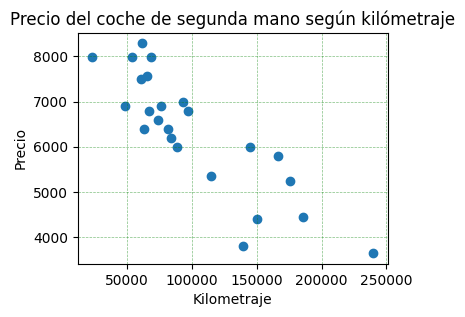

In [9]:
plt.figure(figsize=(4, 3))  # Crear una figura con Ancho: 4, Alto: 3
plt.scatter(X, Y)
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.title('Precio del coche de segunda mano según kilómetraje')
plt.grid(color='green', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

In [10]:
# Función para normalizar los datos
def normalize(X):
    return (X - np.mean(X)) / np.std(X)

# Función para desnormalizar los datos
def denormalize(X_norm, X_original):
    return X_norm * np.std(X_original) + np.mean(X_original)

# Normalizar X e Y
X_norm = normalize(X)
Y_norm = normalize(Y)

# Añadir una columna de unos a X para el término independiente
X_norm = np.column_stack((np.ones(len(X_norm)), X_norm))

# Inicializar parámetros
theta = np.zeros(2)
m = len(Y_norm)
alpha = 0.01  # Tasa de aprendizaje
num_iterations = 1000

# Función de descenso del gradiente
def gradient_descent(X, Y, theta, alpha, num_iterations):
    for _ in range(num_iterations):
        predictions = X.dot(theta)
        theta = theta - (alpha / m) * X.T.dot(predictions - Y)
    return theta

# Ejecutar descenso del gradiente
theta = gradient_descent(X_norm, Y_norm, theta, alpha, num_iterations)

# Desnormalizar los parámetros
theta_denorm = np.zeros(2)
theta_denorm[1] = theta[1] * np.std(Y) / np.std(X)
theta_denorm[0] = np.mean(Y) - theta_denorm[1] * np.mean(X)

print(f"Intercepto (theta0): {theta_denorm[0]}")
print(f"Pendiente (theta1): {theta_denorm[1]}")

Intercepto (theta0): 8499.506064757234
Pendiente (theta1): -0.021448037613188385


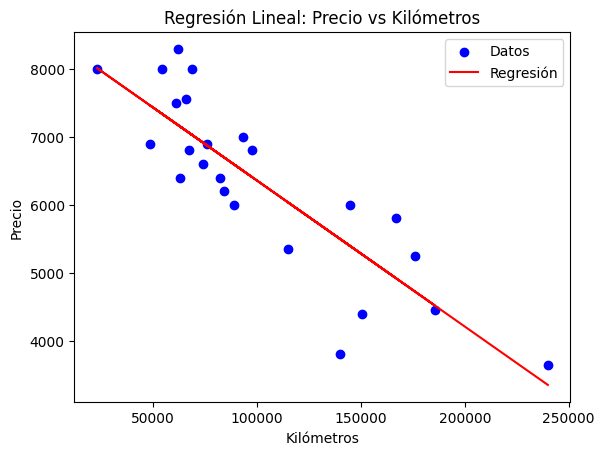

In [11]:
# Graficar los datos y la línea de regresión
plt.scatter(X, Y, color='blue', label='Datos')
plt.plot(X, theta_denorm[0] + theta_denorm[1] * X, color='red', label='Regresión')
plt.xlabel('Kilómetros')
plt.ylabel('Precio')
plt.title('Regresión Lineal: Precio vs Kilómetros')
plt.legend()
plt.show()

In [12]:
# Implementación del método de mínimos cuadrados
X_mincuad = np.column_stack((np.ones(len(X)), X))
theta_mincuad = np.linalg.inv(X_mincuad.T.dot(X_mincuad)).dot(X_mincuad.T).dot(Y)

print("Parámetros por mínimos cuadrados:", theta_mincuad)

Parámetros por mínimos cuadrados: [ 8.49959965e+03 -2.14489636e-02]


In [13]:
# Asumiendo que ya tienes theta_denorm del descenso del gradiente y theta_mincuad de los mínimos cuadrados

# Calcular el error porcentual para theta_0
error_theta0 = abs(theta_denorm[0] - theta_mincuad[0]) / theta_mincuad[0] * 100

# Calcular el error porcentual para theta_1
error_theta1 = abs(theta_denorm[1] - theta_mincuad[1]) / theta_mincuad[1] * 100

# Imprimir los resultados
print("\nComparación entre Descenso del Gradiente y Mínimos Cuadrados:")
print(f"θ₀ (Descenso del Gradiente): {theta_denorm[0]:.2f}")
print(f"θ₀ (Mínimos Cuadrados): {theta_mincuad[0]:.2f}")
print(f"Error porcentual en θ₀: {abs(error_theta0):.3f}%")

print(f"\nθ₁ (Descenso del Gradiente): {theta_denorm[1]:.6f}")
print(f"θ₁ (Mínimos Cuadrados): {theta_mincuad[1]:.6f}")
print(f"Error porcentual en θ₁: {abs(error_theta1):.3f}%")


Comparación entre Descenso del Gradiente y Mínimos Cuadrados:
θ₀ (Descenso del Gradiente): 8499.51
θ₀ (Mínimos Cuadrados): 8499.60
Error porcentual en θ₀: 0.001%

θ₁ (Descenso del Gradiente): -0.021448
θ₁ (Mínimos Cuadrados): -0.021449
Error porcentual en θ₁: 0.004%
